In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.layers import Input
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import roc_curve, auc
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from keras.optimizers import Adam
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("/home/amjad-alhadeed/Downloads/adult.csv")

## Data Collection

In [3]:
# Loading the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Overview of the DataFrame structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
# Checking for missing values in each column
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [6]:
# Filling missing categorical values with 'Unknown'
df['workclass'] = df['workclass'].fillna('Unknown') 
df['occupation'] = df['occupation'].fillna('Unknown')
df['native-country'] = df['native-country'].fillna('Unknown')

In [7]:
# Removing duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

In [8]:
# Displaying unique values in the 'income' column
print(df['income'].unique()) 

['<=50K' '>50K' '<=50K.' '>50K.']


## Data Visualization and Exploration

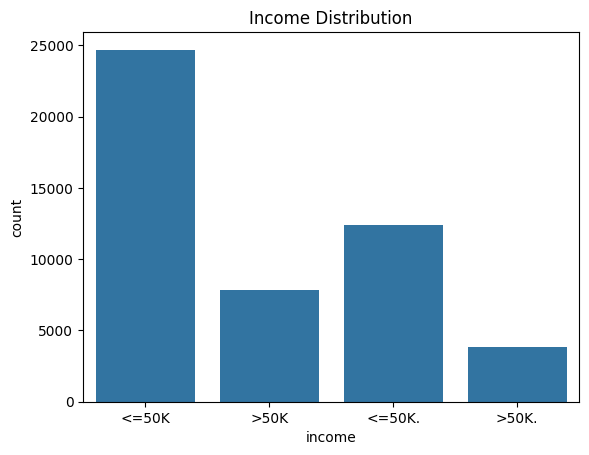

In [9]:
sns.countplot(x='income', data=df)
plt.title('Income Distribution')

plt.savefig('/home/amjad-alhadeed/Desktop/dataa/3.png', dpi=300, bbox_inches='tight')

plt.show()

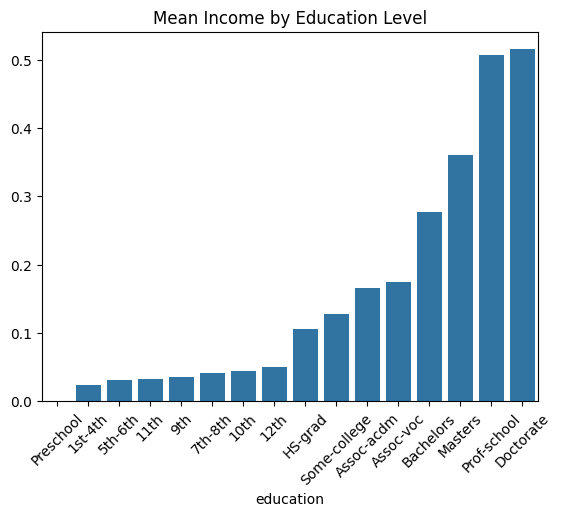

In [10]:
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
mean_income_by_education = df.groupby('education')['income'].mean().sort_values()

sns.barplot(x=mean_income_by_education.index, y=mean_income_by_education.values)
plt.xticks(rotation=45)
plt.title('Mean Income by Education Level')

plt.savefig('/home/amjad-alhadeed/Desktop/dataa/4.png', dpi=300, bbox_inches='tight')

plt.show()

In [11]:
# Identifying outliers using the IQR method for selected numerical features
feature_names = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for feature in feature_names:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    outlier_condition = (df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))
    outliers = df[outlier_condition]

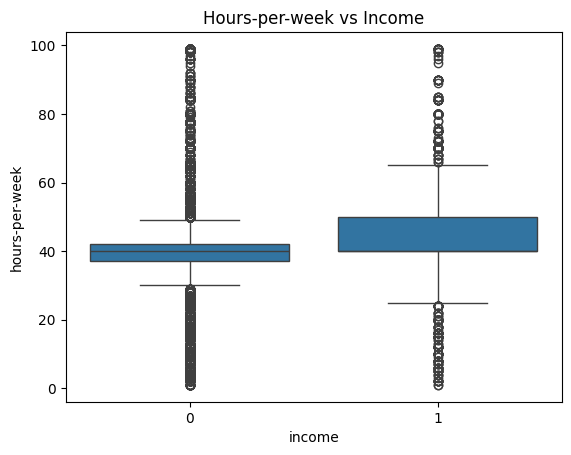

In [12]:
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours-per-week vs Income')

plt.savefig('/home/amjad-alhadeed/Desktop/dataa/5.png', dpi=300, bbox_inches='tight')

plt.show()

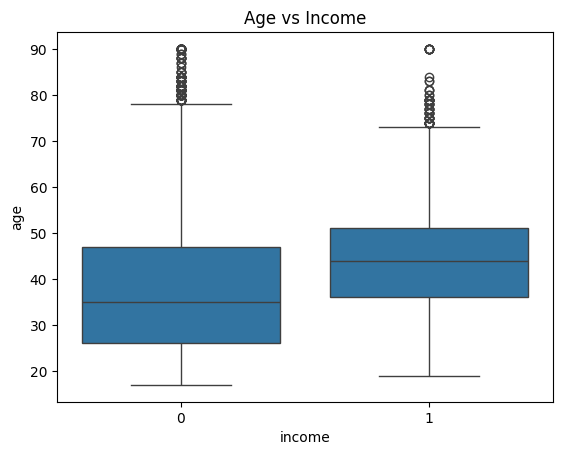

In [13]:
# Boxplot to check the distribution of 'age' across income categories
sns.boxplot(x='income', y='age', data=df)
plt.title('Age vs Income')

plt.savefig('/home/amjad-alhadeed/Desktop/dataa/6.png', dpi=300, bbox_inches='tight')

plt.show()

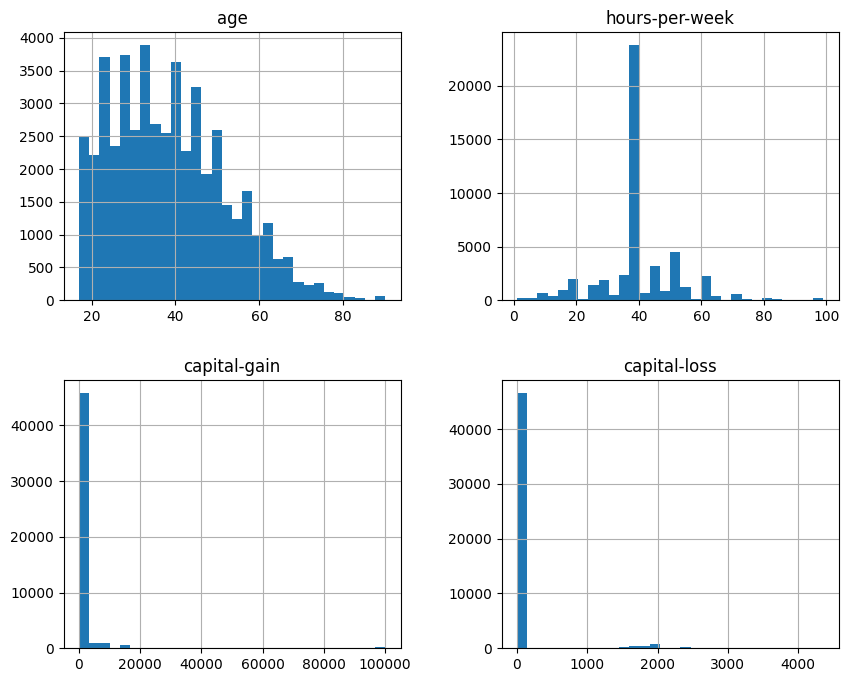

In [14]:
df[['age', 'hours-per-week', 'capital-gain', 'capital-loss']].hist(bins=30, figsize=(10, 8))

plt.savefig('/home/amjad-alhadeed/Desktop/dataa/7.png', dpi=300, bbox_inches='tight')

plt.show()

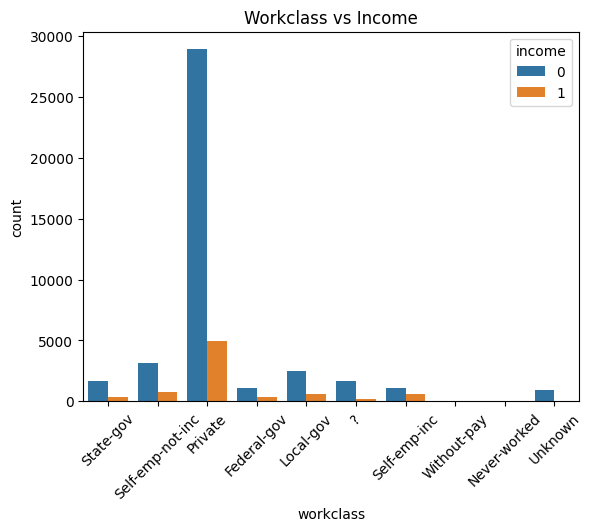

In [15]:
sns.countplot(x='workclass', hue='income', data=df)
plt.title('Workclass vs Income')
plt.xticks(rotation=45)

plt.savefig('/home/amjad-alhadeed/Desktop/dataa/8.png', dpi=300, bbox_inches='tight')

plt.show()

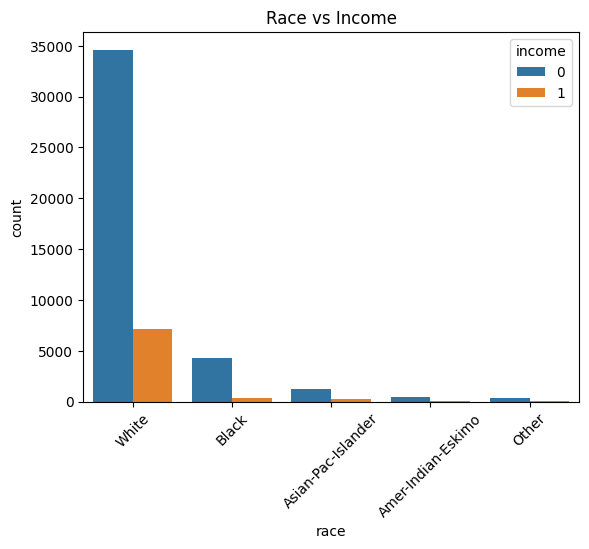

In [16]:
sns.countplot(x='race', hue='income', data=df)
plt.title('Race vs Income')
plt.xticks(rotation=45)

plt.savefig('/home/amjad-alhadeed/Desktop/dataa/9.png', dpi=300, bbox_inches='tight')

plt.show()

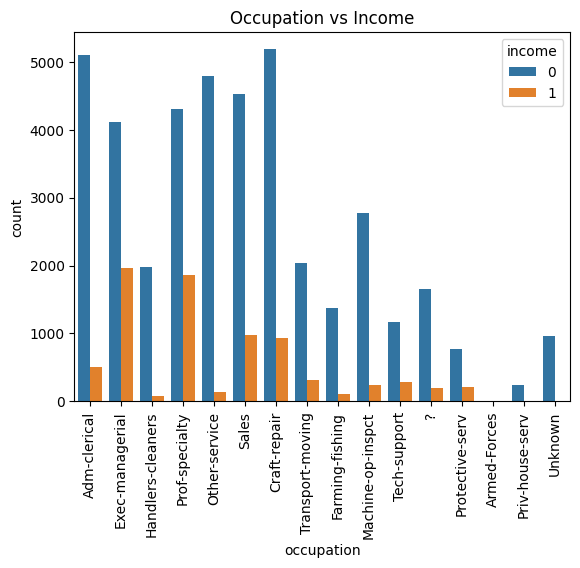

In [17]:
sns.countplot(x='occupation', hue='income', data=df)
plt.title('Occupation vs Income')
plt.xticks(rotation=90)

plt.savefig('/home/amjad-alhadeed/Desktop/dataa/10.png', dpi=300, bbox_inches='tight')

plt.show()

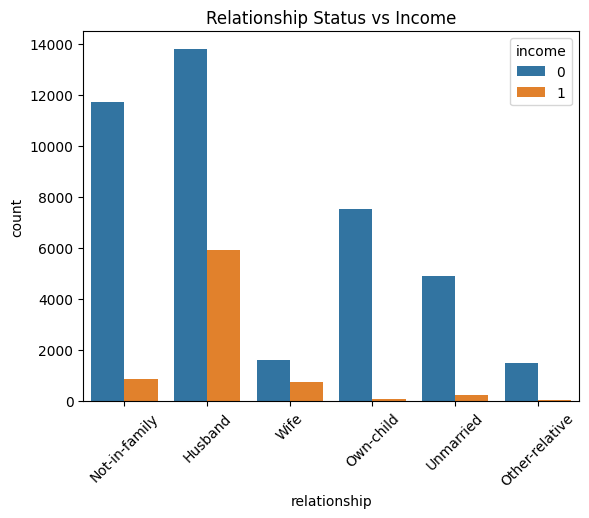

In [18]:
sns.countplot(x='relationship', hue='income', data=df)
plt.title('Relationship Status vs Income')
plt.xticks(rotation=45)

plt.savefig('/home/amjad-alhadeed/Desktop/dataa/11.png', dpi=300, bbox_inches='tight')

plt.show()

## Feature Engineering and Data Preprocessing

In [19]:
# Creating a combined feature and encoding it with one-hot encoding
df['education_occupation'] = df['education'] + "_" + df['occupation']

df = pd.get_dummies(df, columns=['education_occupation'], drop_first=True)

In [20]:
# Applying log transformation to 'capital-gain' and 'capital-loss' to reduce skewness
df['capital-gain'] = np.log1p(df['capital-gain'])
df['capital-loss'] = np.log1p(df['capital-loss'])

In [21]:
# Converting categorical variables into one-hot encoded columns
df = pd.get_dummies(df, drop_first=True)

In [22]:
# Splitting the data into training and test sets with a 80/20 
X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LogisticRegression

In [23]:
# Scaling the features and training a logistic regression model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_lr = LogisticRegression(solver='lbfgs', max_iter=500)
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [24]:
# Standardizing numerical columns using StandardScaler
scaler = StandardScaler()
numerical_columns = ['age', 'hours-per-week', 'capital-gain', 'capital-loss', 'fnlwgt']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [25]:
# Training logistic regression model with 'saga' solver and 400 iterations
model_lr = LogisticRegression(solver='saga', max_iter=400)
model_lr.fit(X_train_scaled, y_train)

/home/amjad-alhadeed/myenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=400, solver='saga')

In [26]:
# Making predictions on the test set using the logistic regression model
y_pred_lr = model_lr.predict(X_test_scaled)

In [27]:
# Calculating and printing the accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8478951142066987


In [28]:
# Generating and displaying the confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix: \n{conf_matrix}")

Confusion Matrix: 
[[7821  322]
 [1163  457]]


In [29]:
# Generating and displaying the classification report for model performance
class_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report: \n{class_report}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      8143
           1       0.59      0.28      0.38      1620

    accuracy                           0.85      9763
   macro avg       0.73      0.62      0.65      9763
weighted avg       0.82      0.85      0.82      9763



In [30]:
# Calculating and printing the ROC-AUC score for model performance
roc_auc = roc_auc_score(y_test, y_pred_lr)
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.6212777997613644


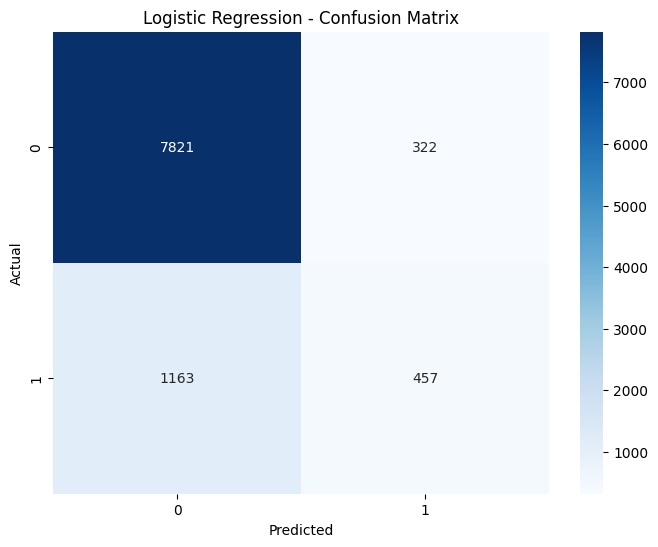

In [31]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues")
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.savefig('/home/amjad-alhadeed/Desktop/dataa/12.png', dpi=300, bbox_inches='tight')

plt.show()

## RandomForestClassifier

In [32]:
# Training a Random Forest classifier, making predictions, and printing accuracy
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.8413397521253713


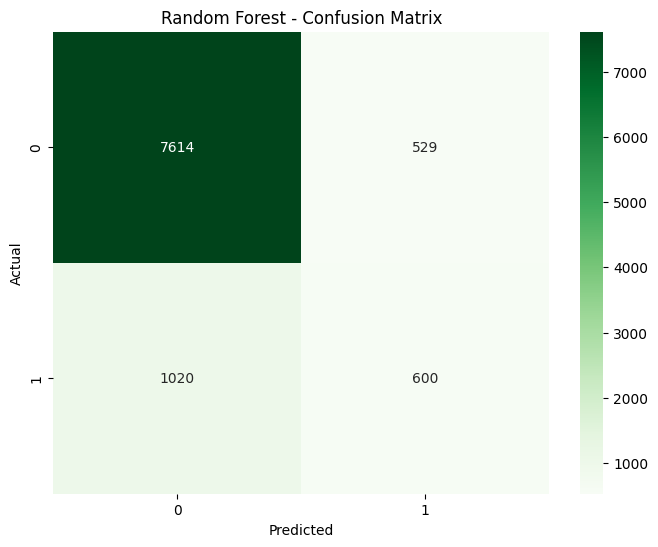

In [33]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens")
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

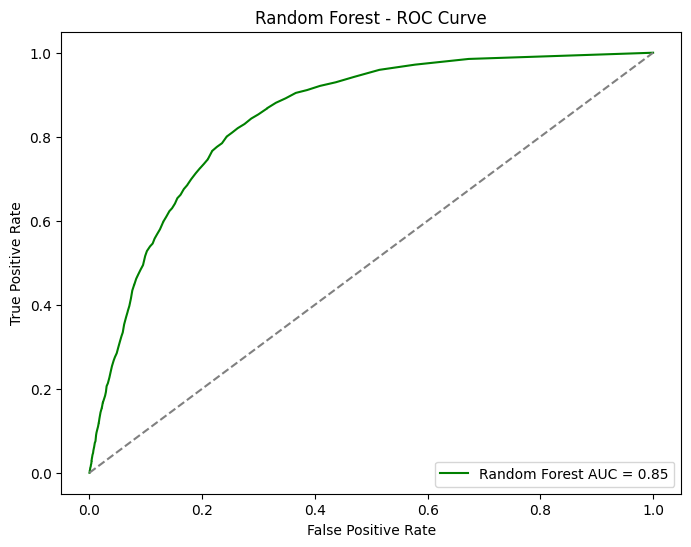

In [34]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, model_rf.predict_proba(X_test_scaled)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Random Forest - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.savefig('/home/amjad-alhadeed/Desktop/dataa/13.png', dpi=300, bbox_inches='tight')

plt.show()

## Deep Learning

In [35]:
# Building a neural network model with regularization and dropout layers for binary classification
model_nn = Sequential()
model_nn.add(Input(shape=(X_train_scaled.shape[1],)))
model_nn.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_nn.add(Dropout(0.5))  # Dropout with 50% probability
model_nn.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_nn.add(Dropout(0.5))  # Dropout with 50% probability
model_nn.add(Dense(1, activation='sigmoid'))

In [36]:
# Compiling the neural network, setting up early stopping, and training the model with validation
model_nn.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_nn.fit(X_train_scaled, y_train, validation_split=0.2, epochs=30, batch_size=32, callbacks=[early_stopping])

Epoch 1/30
977/977 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8319 - loss: 0.6059 - val_accuracy: 0.8481 - val_loss: 0.4387
Epoch 2/30
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8482 - loss: 0.4360 - val_accuracy: 0.8485 - val_loss: 0.3990
Epoch 3/30
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8478 - loss: 0.3968 - val_accuracy: 0.8501 - val_loss: 0.3774
Epoch 4/30
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8511 - loss: 0.3711 - val_accuracy: 0.8526 - val_loss: 0.3601
Epoch 5/30
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8562 - loss: 0.3501 - val_accuracy: 0.8517 - val_loss: 0.3545
Epoch 6/30
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8522 - loss: 0.3442 - val_accuracy: 0.8512 - val_loss: 0.3464
Epoch 7/30
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8534 - loss: 0.3344 - val_accuracy: 0.8511 - val_loss: 0.3421
Epoch 8/30
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8580 - loss: 0.3275 - val_accuracy: 0.

<Figure size 640x480 with 0 Axes>

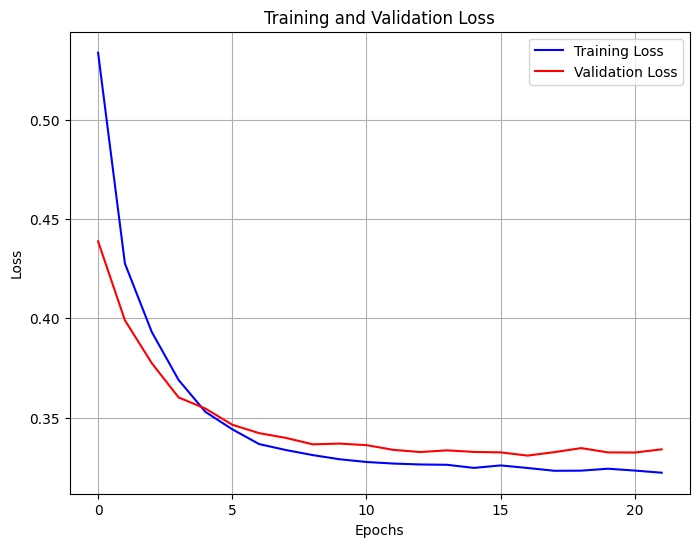

In [37]:
# Function to plot training and validation loss
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


plt.savefig('/home/amjad-alhadeed/Desktop/dataa/14.png', dpi=300, bbox_inches='tight')


# Plot the loss and accuracy
plot_loss(history)

<Figure size 640x480 with 0 Axes>

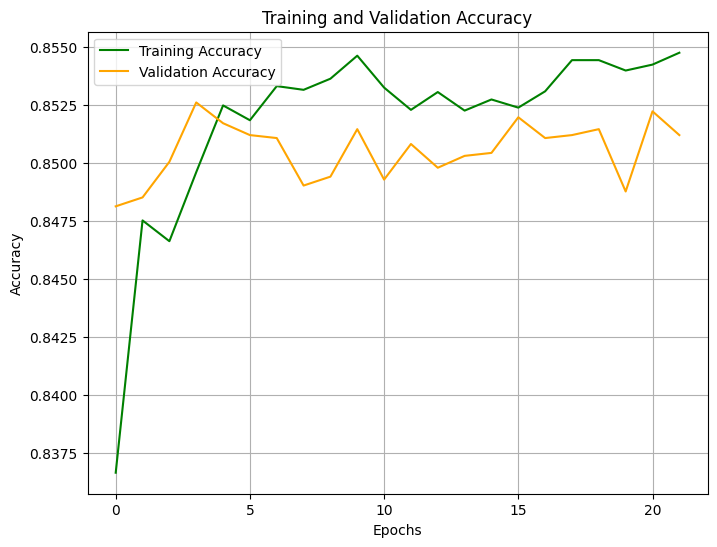

In [38]:
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


plt.savefig('/home/amjad-alhadeed/Desktop/dataa/15.png', dpi=300, bbox_inches='tight')

plot_accuracy(history)